# MASKS VISUALIZATION

The SCI data, taken as PTG and RAW data from the Planck Legacy Archive (PLA), are the so-called scientific data (already cleaned of various effects and glitches) and each data has a flag that indicates a peculiarity, i.e. point object, planet, galaxy plane and others. In particular, the flags of interest are those concerning the _galactic plane_ and the _point source_:
```
bit 4: StrongSignal; 1 = In Galactic plane
bit 5: StrongSource; 1 = On point source
```
Data with those flags must be discarded.

Here we can view the arrangement of the galactic plane and the point sources. For this purpose, we use the masks downloaded from the Planck Legacy Archive (PLA), in particular:
- Galactic dust mask: `COM_Mask_PCCS-143-zoneMask_2048_R2.01.fits`
- Point sources: `HFI_Mask_PointSrc_2048_R2.00.fits`

In [1]:
import healpy as hp
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
if not os.path.exists("ris/masks"):
    print("Creating 'ris/masks' directory")
    os.makedirs("ris/masks")

Creating 'ris/masks' directory


## Galactic dust mask

In [3]:
GD_MASK = hp.read_map("/mnt/d/Tesi/data/Masks/COM_Mask_PCCS-143-zoneMask_2048_R2.01.fits")

NSIDE = 2048
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


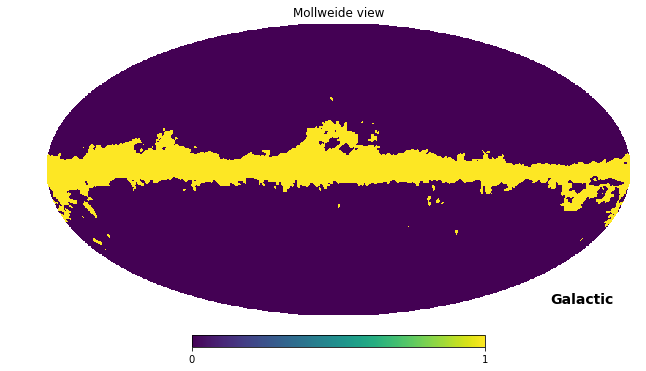

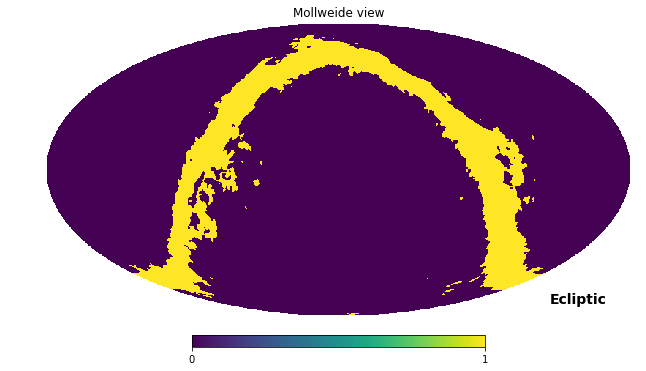

In [4]:
# Normalize the pixel values (in the original mask values are 0 and 2)
GD_MASK /= 2

# Galactic coordinates
hp.mollview(GD_MASK, coord="G")
plt.savefig("ris/masks/G_galactic-dust-mask.png", dpi=800)
plt.show()
# Ecliptic coordinates
hp.mollview(GD_MASK, coord="GE")
plt.savefig("ris/masks/E_galactic-dust-mask.png", dpi=800)
plt.show()

## Point sources mask

In [5]:
PS_MASK = hp.read_map("/mnt/d/Tesi/data/Masks/HFI_Mask_PointSrc_2048_R2.00.fits")

NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT


/home/paolo/.miniconda3/envs/idp/lib/python3.6/site-packages/healpy/fitsfunc.py:371: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  warnings.warn("No INDXSCHM keyword in header file : " "assume {}".format(schm))


Ordering converted to RING


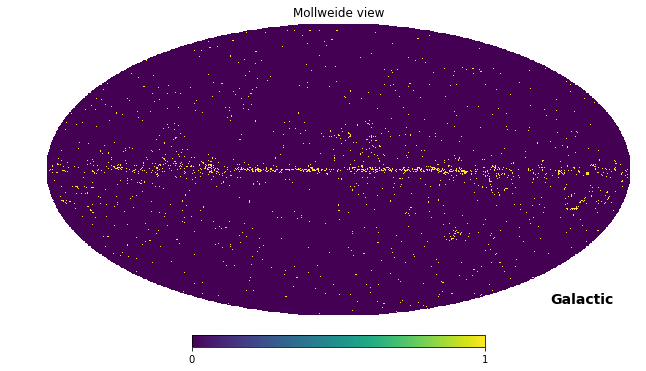

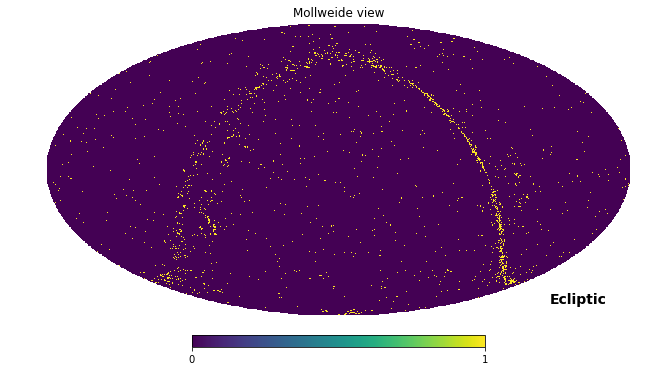

In [6]:
# Invert the mask (in the original mask 0 = point source, we want it inverted)
PS_MASK = 1 - PS_MASK

# Galactic coordinates
hp.mollview(PS_MASK, coord="G")
plt.savefig("ris/masks/G_point-sources-mask.png", dpi=800)
plt.show()
# Ecliptic coordinates
hp.mollview(PS_MASK, coord="GE")
plt.savefig("ris/masks/E_point-sources-mask.png", dpi=800)
plt.show()

## Total mask

### Total mask (no differences between GD and PS)

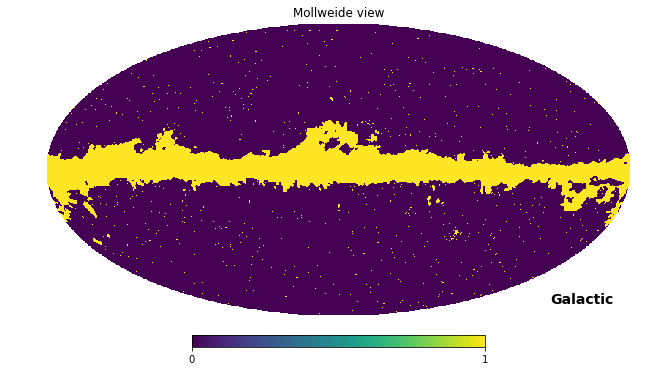

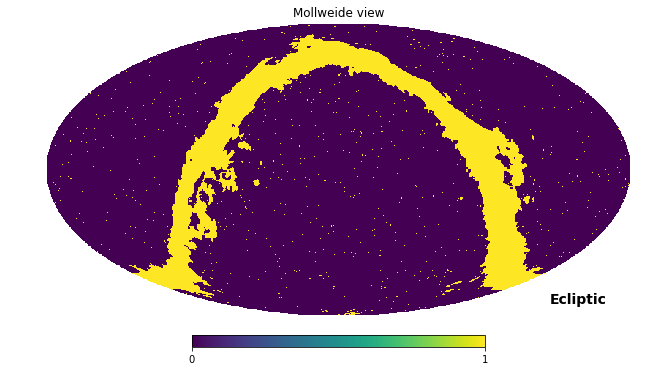

In [7]:
MASK_nd = GD_MASK + PS_MASK
MASK_nd[MASK_nd >= 1] = 1

# Galactic coordinates
hp.mollview(MASK_nd, coord="G")
plt.savefig("ris/masks/G_total-mask-ND.png", dpi=800)
plt.show()
# Ecliptic coordinates
hp.mollview(MASK_nd, coord="GE")
plt.savefig("ris/masks/E_total-mask-ND.png", dpi=800)
plt.show()

### Total mask (yes differences between GD and PS)

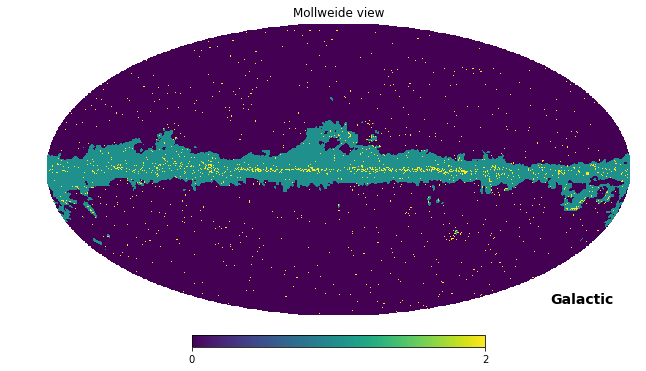

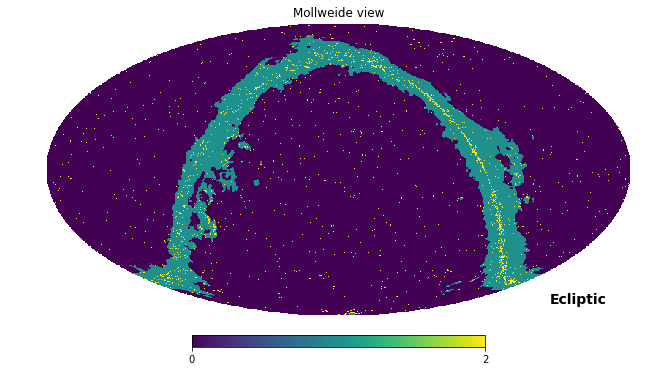

In [8]:
MASK_yd = GD_MASK + 2*PS_MASK
MASK_yd[MASK_yd >= 2] = 2
MASK_yd[MASK_yd == 1] = 1

# Galactic coordinates
hp.mollview(MASK_yd, coord="G")
plt.savefig("ris/masks/G_total-mask-YD.png", dpi=800)
plt.show()
# Ecliptic coordinates
hp.mollview(MASK_yd, coord="GE")
plt.savefig("ris/masks/E_total-mask-YD.png", dpi=800)
plt.show()